In [1]:
import pandas as pd

import requests
from io import StringIO
def get_github_csv_data(github_url):
    response = requests.get(github_url)
    
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        # Hatalı satırları atlayarak CSV'yi oku
        df = pd.read_csv(csv_data)
        return df
    else:
        raise Exception(f"Veri çekme hatası. HTTP Durum Kodu: {response.status_code}")

gfe=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/gfe.csv")


gfe=gfe.set_index("Tarih")
gfe.index=pd.to_datetime(gfe.index)


endeksler=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/endeksler.csv")
endeksler=endeksler.set_index("Ürün")
endeksler.loc["Gıda"]=gfe["GFE"].values



gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

endeksler = pd.concat([gida_index, other_indices])
endeksler1=endeksler.T
endeksler1=endeksler1.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler1))))
endeksler1=endeksler1.drop("Gıda",axis=1)

endeksler=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/endeksler.csv")
endeksler=endeksler.set_index("Ürün")
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler)))
ağırlıklar=pd.read_excel("Weights_2022.xlsx")
cols=ağırlıklar["Unnamed: 1"].dropna().iloc[2:130].values
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")
ağırlıklar.columns=["Grup","Ağırlık"]
endeksler=endeksler[cols]
gruplar=pd.concat([ağırlıklar.reset_index().drop("index",axis=1),endeksler.T.reset_index().iloc[:,1:]],axis=1)
weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()

# Rename columns for clarity
weighted_sums.columns = ['Grup'] + [f'{col}_Toplam' for col in gruplar.columns[2:]]
# Calculate total weight for each group
total_weights = gruplar.groupby('Grup')['Ağırlık'].sum().reset_index()
total_weights.columns = ['Grup', 'Toplam_Ağırlık']

# Merge total weights with weighted sums
weighted_sums = pd.merge(weighted_sums, total_weights, on='Grup')

# Calculate indices for each date by dividing weighted sum by total weight
for col in weighted_sums.columns[1:-1]:  # Exclude 'Grup' and 'Toplam_Ağırlık'
    weighted_sums[col] = weighted_sums[col] / weighted_sums['Toplam_Ağırlık']

# Drop 'Toplam_Ağırlık' for display purposes
weighted_indices = weighted_sums.drop(columns=['Toplam_Ağırlık'])

weighted_indices=weighted_indices.T
cols=weighted_indices.iloc[0,:]
weighted_indices.columns=cols
weighted_indices=weighted_indices.iloc[1:,:]
weighted_indices=weighted_indices.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(weighted_indices)))


ağırlıklar=pd.read_excel("Weights_2022.xlsx")
cols=ağırlıklar["Unnamed: 1"].dropna().iloc[2:130].values
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")
ağırlıklar.columns=["Grup","Ağırlık"]
endeksler=endeksler[cols]
gruplar=pd.concat([ağırlıklar.reset_index().drop("index",axis=1),endeksler.T.reset_index().iloc[:,1:]],axis=1)
weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()

# Rename columns for clarity
weighted_sums.columns = ['Grup'] + [f'{col}_Toplam' for col in gruplar.columns[2:]]
# Calculate total weight for each group
total_weights = gruplar.groupby('Grup')['Ağırlık'].sum().reset_index()
total_weights.columns = ['Grup', 'Toplam_Ağırlık']

# Merge total weights with weighted sums
weighted_sums = pd.merge(weighted_sums, total_weights, on='Grup')

# Calculate indices for each date by dividing weighted sum by total weight
for col in weighted_sums.columns[1:-1]:  # Exclude 'Grup' and 'Toplam_Ağırlık'
    weighted_sums[col] = weighted_sums[col] / weighted_sums['Toplam_Ağırlık']

# Drop 'Toplam_Ağırlık' for display purposes
weighted_indices = weighted_sums.drop(columns=['Toplam_Ağırlık'])

weighted_indices=weighted_indices.T
cols=weighted_indices.iloc[0,:]
weighted_indices.columns=cols
weighted_indices=weighted_indices.iloc[1:,:]
weighted_indices=weighted_indices.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(weighted_indices)))


C:\Users\Bora\AppData\Local\Temp\ipykernel_15780\3077714087.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ağırlıklar=ağırlıklar.fillna(method="ffill")
C:\Users\Bora\AppData\Local\Temp\ipykernel_15780\3077714087.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()
C:\Users\Bora\AppData\Local\Temp\ipykernel_15780\3077714087.py:84: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ağırlıkl

([<matplotlib.axis.XTick at 0x210da55d990>,
 [Text(20007.0, 0, '2024-10-11'),
  Text(20012.0, 0, '2024-10-16'),
  Text(20017.0, 0, '2024-10-21'),
  Text(20022.0, 0, '2024-10-26'),
  Text(20027.0, 0, '2024-10-31'),
  Text(20032.0, 0, '2024-11-05'),
  Text(20037.0, 0, '2024-11-10'),
  Text(20042.0, 0, '2024-11-15'),
  Text(20047.0, 0, '2024-11-20'),
  Text(20052.0, 0, '2024-11-25'),
  Text(20057.0, 0, '2024-11-30'),
  Text(20062.0, 0, '2024-12-05'),
  Text(20067.0, 0, '2024-12-10'),
  Text(20072.0, 0, '2024-12-15'),
  Text(20077.0, 0, '2024-12-20'),
  Text(20082.0, 0, '2024-12-25')])

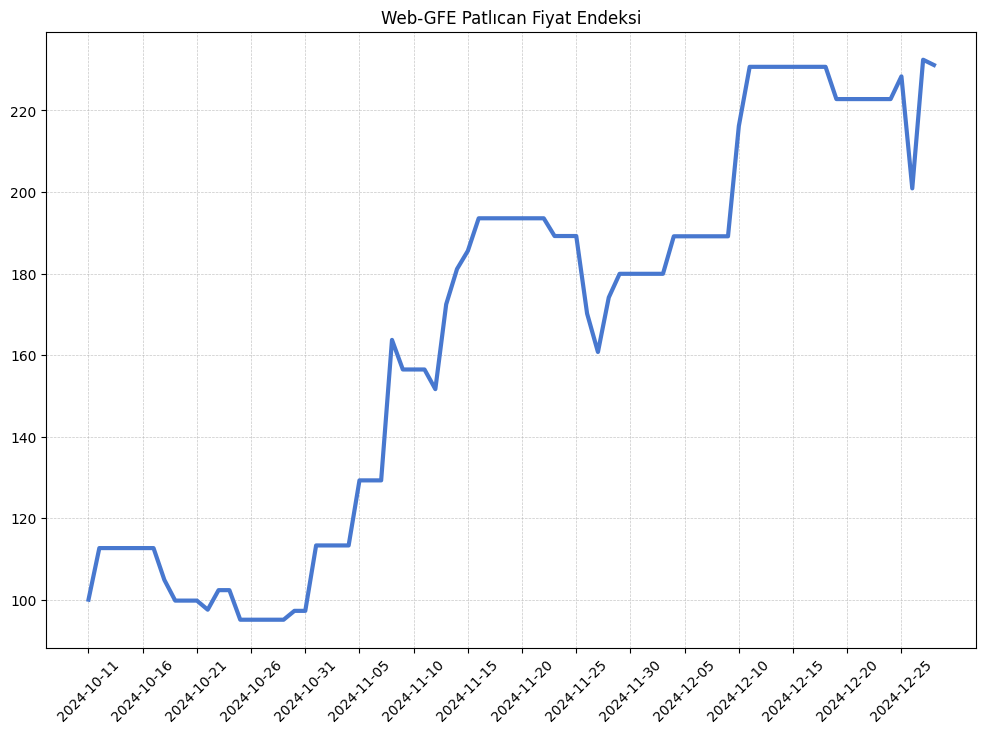

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-muted')
plt.figure(figsize=(12,8))
ürün="Patlıcan"
plt.title(f"Web-GFE {ürün} Fiyat Endeksi")
plt.plot(endeksler[ürün],linewidth=3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(endeksler.index[::5],rotation=45)

In [3]:
def hareketli_aylik_ortalama1(df):
            değer=df.name
            df=pd.DataFrame(df)
            df["Tarih"]=pd.to_datetime(df.index)
            df['Aylık Ortalama'] = df.groupby(df['Tarih'].dt.to_period('M'))[değer].expanding().mean().reset_index(level=0, drop=True)
            df.index=pd.to_datetime(df.index)
            return df


def hareketli_aylik_ortalama(df):
        değer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
        df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
        
        # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
        df["Aylık Ortalama"] = (
            df[df["Gün Sırası"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[değer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yükle
        df.index = pd.to_datetime(df.index)
        return df

# Hareketli aylık ortalama hesaplama
hareketlima = hareketli_aylik_ortalama(gfe["GFE"])
hareketlima["Aylık Ortalama"]=hareketlima["Aylık Ortalama"].fillna(method="ffill")

C:\Users\Bora\AppData\Local\Temp\ipykernel_15780\3057360898.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hareketlima["Aylık Ortalama"]=hareketlima["Aylık Ortalama"].fillna(method="ffill")


In [4]:
hareketlima1 = hareketli_aylik_ortalama1(gfe["GFE"])


In [5]:
data=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/sepet.csv")


In [6]:

try:
    data=data.set_index(data["Unnamed: 0"]).drop("Unnamed: 0",axis=1)
except:
    data=data.set_index(data["original_index"]).drop("original_index",axis=1)
data.index.name=""


In [7]:
ağırlıklar=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()
del ağırlıklar["Unnamed: 0"]
ağırlıklar

,Ağırlık,Değişim,Endeks_2024-10-11,Endeks_2024-10-12,Ağırlıklı Endeks_2024-10-12,Endeks_2024-10-13,Ağırlıklı Endeks_2024-10-13,Endeks_2024-10-14,Ağırlıklı Endeks_2024-10-14,Endeks_2024-10-15,...,Endeks_2024-12-24,Ağırlıklı Endeks_2024-12-24,Endeks_2024-12-25,Ağırlıklı Endeks_2024-12-25,Endeks_2024-12-26,Ağırlıklı Endeks_2024-12-26,Endeks_2024-12-27,Ağırlıklı Endeks_2024-12-27,Endeks_2024-12-28,Ağırlıklı Endeks_2024-12-28
Ürün,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,0.001360,3.063199,100.0,100.0,0.135967,100.000000,0.135967,100.000000,0.135967,100.000000,...,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132
Armut,0.007882,-6.341611,100.0,100.0,0.788155,100.000000,0.788155,100.000000,0.788155,100.000000,...,93.281611,0.735204,98.496405,0.776305,101.752901,0.801971,92.089342,0.725807,93.658389,0.738174
Ay Çekirdeği,0.002469,0.983510,100.0,100.0,0.246883,100.000000,0.246883,100.000000,0.246883,100.000000,...,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312
Ayran,0.002014,3.243320,100.0,100.0,0.201394,100.042099,0.201479,100.042099,0.201479,99.904933,...,102.620518,0.206672,102.620518,0.206672,103.243320,0.207926,103.243320,0.207926,103.243320,0.207926
Ayva,0.001106,-3.887606,100.0,100.0,0.110594,100.000000,0.110594,100.000000,0.110594,100.000000,...,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,0.002119,14.113841,100.0,100.0,0.211882,100.000000,0.211882,100.561798,0.213072,100.561798,...,114.393085,0.242378,113.926263,0.241389,113.926263,0.241389,113.926263,0.241389,114.113841,0.241787
Çilek,0.003543,0.000000,100.0,100.0,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,...,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264
Üzüm,0.017232,6.227381,100.0,100.0,1.723196,100.000000,1.723196,100.000000,1.723196,100.453758,...,104.586388,1.802229,103.843304,1.789424,102.947692,1.773991,104.016154,1.792403,106.227381,1.830506


In [8]:
endeksler=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler)))
endeksler

Ürün,Antep Fıstığı,Armut,Ay Çekirdeği,Ayran,Ayva,Ayçiçek Yağı,Badem İçi,Baharat,Baklava,Bal,...,Zeytin,Zeytinyağı,Çarliston Biber,Çay,Çikolata Krem,Çikolata Tablet,Çilek,Üzüm,Şeftali,Şehriye
2024-10-11,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000
2024-10-12,100.000000,100.000000,100.00000,100.000000,100.000000,100.387276,99.166667,100.000000,100.000000,100.199273,...,100.033964,100.000000,103.495485,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000
2024-10-13,100.000000,100.000000,100.00000,100.042099,100.000000,100.387276,99.166667,100.000000,100.000000,100.199273,...,100.000000,100.000000,103.495485,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000
2024-10-14,100.000000,100.000000,100.00000,100.042099,100.000000,101.327991,99.166667,100.000000,100.000000,100.199273,...,100.342729,100.000000,103.495485,100.000000,100.000000,100.561798,100.0,100.000000,100.017876,100.000000
2024-10-15,100.000000,100.000000,100.00000,99.904933,100.000000,101.327991,99.166667,100.000000,100.000000,100.772941,...,100.342729,100.000000,103.495485,100.000000,100.000000,100.561798,100.0,100.453758,100.017876,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,103.063199,93.281611,100.98351,102.620518,96.112394,112.502387,104.691921,101.624901,103.237041,104.182011,...,102.007603,93.782019,83.475079,111.509202,103.500390,114.393085,100.0,104.586388,100.017876,105.995275
2024-12-25,103.063199,98.496405,100.98351,102.620518,96.112394,112.502387,104.504244,101.624901,103.237041,104.182011,...,101.960539,93.735937,89.043797,111.423312,103.550069,113.926263,100.0,103.843304,100.017876,105.995275
2024-12-26,103.063199,101.752901,100.98351,103.243320,96.112394,112.502387,104.504244,101.624901,103.237041,104.182011,...,101.994355,93.735937,89.043797,111.596991,103.466347,113.926263,100.0,102.947692,100.017876,105.995275
2024-12-27,103.063199,92.089342,100.98351,103.243320,96.112394,112.502387,104.504244,101.619556,103.237041,104.182011,...,101.960539,93.735937,89.043797,111.596991,103.678356,113.926263,100.0,104.016154,100.017876,105.995275


In [9]:
sepet=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/sepet.csv")
sepet=sepet.set_index(sepet["original_index"])
del sepet["original_index"]
#sepet["Değişim"]=((sepet.iloc[:,-1]/sepet.iloc[:,1])-1)*100
sepet

,Ürün,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,2024-10-19,...,2024-12-19,2024-12-20,2024-12-21,2024-12-22,2024-12-23,2024-12-24,2024-12-25,2024-12-26,2024-12-27,2024-12-28
original_index,,,,,,,,,,,,,,,,,,,,,
Beyaz Peynir,Tahsildaroğlu Dilimli Ezine peynir 450 Gr ( %4...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90
Beyaz Peynir,Tahsildaroğlu Ezine Peyniri 500 Gr ( %45 Keç...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90
Meyve Suyu,Dimes % 100 Kırmızı Meyveler 1 lt,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,...,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
Süt,Baltalı % 100 Pastörize Keçi Sütü 1L,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,...,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50
Tulum Peyniri,Savak Erzincan Tulum Peyniri Kg % 100 Koyun Sütü,490.90,490.90,490.90,490.90,490.90,490.90,490.90,490.90,490.90,...,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Konserve Balık,Shaku Sushi Sakura,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,...,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99
Baharat,Susam,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,...,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90
Baharat,Tarçın,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,...,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90


In [287]:
from datetime import timedelta




In [11]:
import warnings
from datetime import datetime,timedelta
warnings.filterwarnings("ignore")
endeksler=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
del endeksler["Ürün"]
degisimler=[]
for col in endeksler.index:
    ma24=hareketli_aylik_ortalama(pd.DataFrame(endeksler.loc[col].T)[:-1].set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler.loc[col].T)-1)).iloc[:,0])
    ma24=ma24["Aylık Ortalama"].fillna(method="ffill")
    ay=datetime.now().month
    yıl=datetime.now().year
    önceki_ay=(datetime.now()-timedelta(days=30)).month
    degisim=(((ma24.loc[f"{yıl}-{ay}"].iloc[-1]/ma24.loc[f"{yıl}-{önceki_ay}"].iloc[-1]))-1)*100
    degisimler.append(degisim)

endeksler["Değişim"]=degisimler 
endeksler

,Endeks_2024-10-11,Endeks_2024-10-12,Endeks_2024-10-13,Endeks_2024-10-14,Endeks_2024-10-15,Endeks_2024-10-16,Endeks_2024-10-17,Endeks_2024-10-18,Endeks_2024-10-19,Endeks_2024-10-20,...,Endeks_2024-12-20,Endeks_2024-12-21,Endeks_2024-12-22,Endeks_2024-12-23,Endeks_2024-12-24,Endeks_2024-12-25,Endeks_2024-12-26,Endeks_2024-12-27,Endeks_2024-12-28,Değişim
Ürün,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,103.063199,103.063199,103.063199,103.063199,103.063199,103.063199,103.063199,103.063199,103.063199,5.201896
Armut,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,96.663887,96.663887,96.663886,96.643752,93.281611,98.496405,101.752901,92.089342,93.658389,-3.477881
Ay Çekirdeği,100.0,100.0,100.000000,100.000000,100.000000,99.472789,99.472789,99.472789,99.472789,99.472789,...,100.983510,100.983510,100.983510,100.983510,100.983510,100.983510,100.983510,100.983510,100.983510,2.863327
Ayran,100.0,100.0,100.042099,100.042099,99.904933,99.904933,99.782676,99.782676,99.782676,99.824775,...,103.093566,103.093566,103.093566,103.095836,102.620518,102.620518,103.243320,103.243320,103.243320,3.418285
Ayva,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,92.263279,93.802925,93.802925,93.802925,96.112394,96.112394,96.112394,96.112394,96.112394,-17.674564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,100.0,100.0,100.000000,100.561798,100.561798,103.012611,103.684443,103.684443,106.594458,106.594458,...,114.393085,114.393085,114.393085,114.393085,114.393085,113.926263,113.926263,113.926263,114.113841,5.334028
Çilek,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000
Üzüm,100.0,100.0,100.000000,100.000000,100.453758,100.453758,100.751821,100.751821,100.751821,100.751821,...,105.709546,105.709546,105.709546,105.709546,104.586388,103.843304,102.947692,104.016154,106.227381,1.236515


In [12]:
from datetime import datetime
today = datetime.today().strftime("%d-%m-%Y")

In [13]:

import matplotlib.pyplot as plt
gfe=gfe.loc["2024-11-30":]

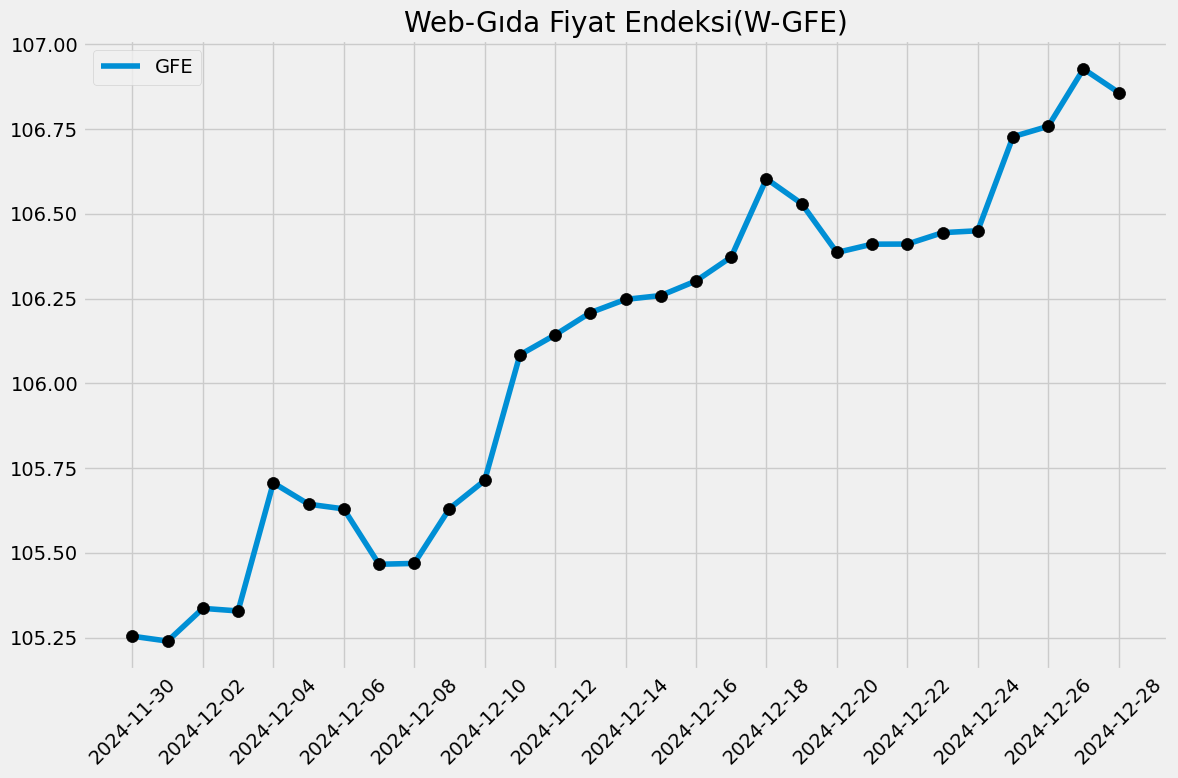

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web-Gıda Fiyat Endeksi(W-GFE)")
plt.plot(gfe["GFE"],label="GFE")
plt.scatter(x=gfe["GFE"].index,y=gfe["GFE"].values,color="black",zorder=3,s=75)
plt.xticks(gfe.index[::2],rotation=45)
plt.legend()
plt.tight_layout()
from datetime import date
plt.savefig("gfe_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [15]:
gfe=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/gfe.csv")
gfe=gfe.set_index("Tarih")
gfe.index=pd.to_datetime(gfe.index)



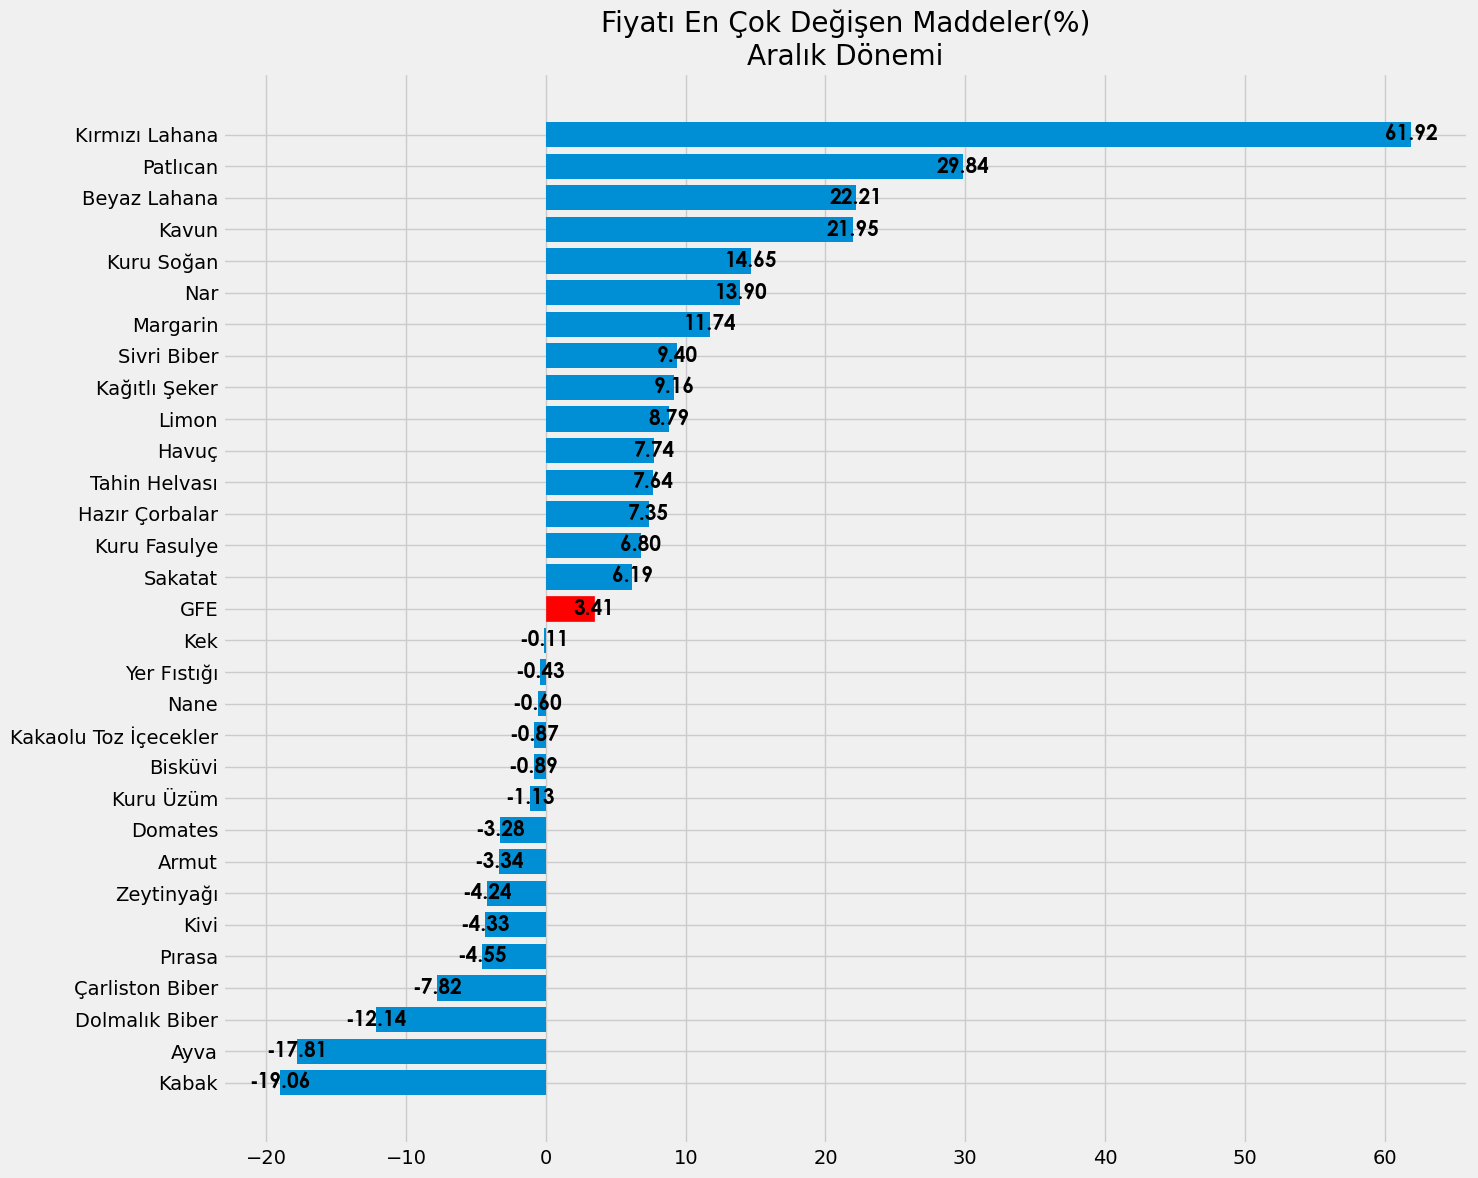

In [294]:

fark=endeksler["Değişim"]
veri=pd.concat([fark.sort_values().head(15),fark.sort_values().tail(15)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri.loc["GFE"]=((hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill").loc[f"{yıl}-{ay}"]["Aylık Ortalama"].iloc[-1]/hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill").loc[f"{yıl}-{önceki_ay}"]["Aylık Ortalama"].iloc[-1]-1)*100)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,12))

plt.title(f"Fiyatı En Çok Değişen Maddeler(%)\nAralık Dönemi")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.savefig("ürünler_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

plt.show()

In [295]:
sepet["Değişim"]=(sepet[f"{yıl}-{ay}-24"]/sepet[f"{yıl}-{önceki_ay}-30"]-1)*100

In [296]:
sepet=sepet.sort_values(by="Değişim")

In [297]:
sepet=sepet.set_index("Ürün")

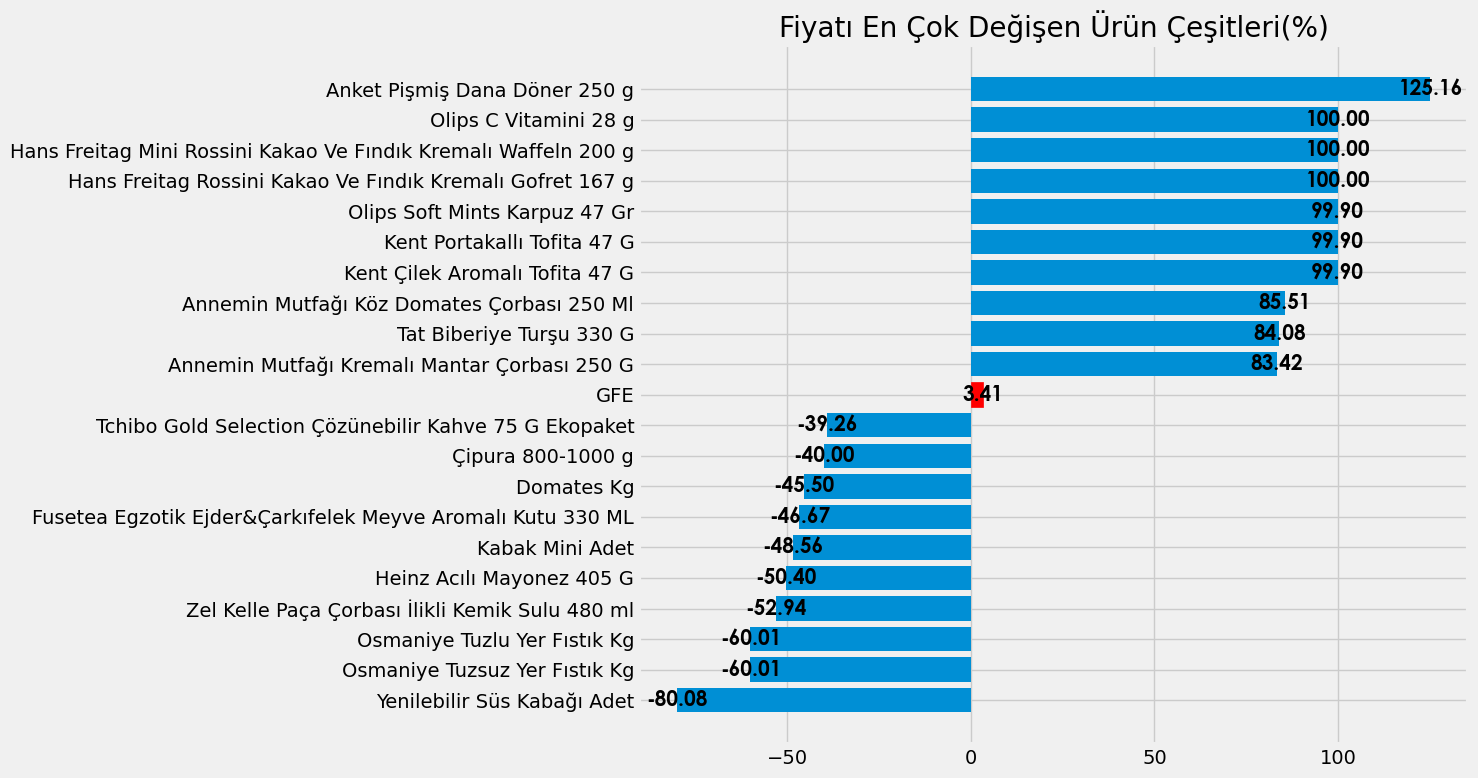

In [298]:

fark=sepet["Değişim"]
veri=pd.concat([fark.sort_values().head(10),fark.sort_values().tail(10)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri.loc["GFE"]=((hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill").loc[f"{yıl}-{ay}"]["Aylık Ortalama"].iloc[-1]/hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill").loc[f"{yıl}-{önceki_ay}"]["Aylık Ortalama"].iloc[-1]-1)*100)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
first=gfe.index[-24].strftime("%d.%m.%Y")
last=gfe.index[-1].strftime("%d.%m.%Y")
plt.title(f"Fiyatı En Çok Değişen Ürün Çeşitleri(%)")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.savefig("çeşitler_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


In [39]:
ağırlıklar=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()
del ağırlıklar["Unnamed: 0"]
ağırlıklar

,Ağırlık,Değişim,Endeks_2024-10-11,Endeks_2024-10-12,Ağırlıklı Endeks_2024-10-12,Endeks_2024-10-13,Ağırlıklı Endeks_2024-10-13,Endeks_2024-10-14,Ağırlıklı Endeks_2024-10-14,Endeks_2024-10-15,...,Endeks_2024-12-24,Ağırlıklı Endeks_2024-12-24,Endeks_2024-12-25,Ağırlıklı Endeks_2024-12-25,Endeks_2024-12-26,Ağırlıklı Endeks_2024-12-26,Endeks_2024-12-27,Ağırlıklı Endeks_2024-12-27,Endeks_2024-12-28,Ağırlıklı Endeks_2024-12-28
Ürün,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,0.001360,3.063199,100.0,100.0,0.135967,100.000000,0.135967,100.000000,0.135967,100.000000,...,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132
Armut,0.007882,-6.341611,100.0,100.0,0.788155,100.000000,0.788155,100.000000,0.788155,100.000000,...,93.281611,0.735204,98.496405,0.776305,101.752901,0.801971,92.089342,0.725807,93.658389,0.738174
Ay Çekirdeği,0.002469,0.983510,100.0,100.0,0.246883,100.000000,0.246883,100.000000,0.246883,100.000000,...,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312
Ayran,0.002014,3.243320,100.0,100.0,0.201394,100.042099,0.201479,100.042099,0.201479,99.904933,...,102.620518,0.206672,102.620518,0.206672,103.243320,0.207926,103.243320,0.207926,103.243320,0.207926
Ayva,0.001106,-3.887606,100.0,100.0,0.110594,100.000000,0.110594,100.000000,0.110594,100.000000,...,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,0.002119,14.113841,100.0,100.0,0.211882,100.000000,0.211882,100.561798,0.213072,100.561798,...,114.393085,0.242378,113.926263,0.241389,113.926263,0.241389,113.926263,0.241389,114.113841,0.241787
Çilek,0.003543,0.000000,100.0,100.0,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,...,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264
Üzüm,0.017232,6.227381,100.0,100.0,1.723196,100.000000,1.723196,100.000000,1.723196,100.453758,...,104.586388,1.802229,103.843304,1.789424,102.947692,1.773991,104.016154,1.792403,106.227381,1.830506


In [77]:
data=pd.read_excel("C:/Users/Bora/Documents/GitHub/Enflasyon-SATRIM/harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
ağırlık=pd.read_excel("C:/Users/Bora/Documents/GitHub/Enflasyon-SATRIM/tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")


ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values


In [99]:
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])

In [18]:
import numpy as np
weighted_indices_ma=pd.DataFrame()
for col in weighted_indices.columns:
    degisim=hareketli_aylik_ortalama(weighted_indices[col]).fillna(method="ffill")["Aylık Ortalama"]
    ay=datetime.now().month
    yıl=datetime.now().year
    önceki_ay=(datetime.now()-timedelta(days=30)).month
    degisim=(((degisim.loc[f"{yıl}-{ay}"].iloc[-1]/degisim.loc[f"{yıl}-{önceki_ay}"].iloc[-1]))-1)*100
    weighted_indices_ma[col]=[degisim]
    
weighted_indices_ma=weighted_indices_ma.rename(columns={"Başka yerde sınıflandırılamayan diğer gıda ürünleri (tuz, sirke, ketçap, mayonez vb.)":"Başka yerde sınıflandırılamayan diğer gıda ürünleri (tuz, kabartma maddeleri, sirke, ketçap, mayonez vb.)"})
weighted_indices_ma=weighted_indices_ma.rename(columns={"Dana Eti":"Dana eti"})
weighted_indices_ma=weighted_indices_ma.rename(columns={"Kuzu Eti":"Kuzu eti"})
weighted_indices_ma=weighted_indices_ma.rename(columns={"Tavuk Eti":"Tavuk eti"})
weighted_indices_ma=weighted_indices_ma.rename(columns={"Taze Balık":"Taze balık"})
weighted_indices_ma=weighted_indices_ma.rename(columns={"Taze Meyveler":"Taze meyveler"})
weighted_indices_ma=weighted_indices_ma.rename(columns={"Makarna Çeşitleri":"Makarna çeşitleri"})  

tüik=data[weighted_indices_ma.columns]
tüik=tüik.dropna()
tüik.loc[pd.to_datetime("2024-12-31")]=tüik.loc["2024-11-30"]*(1+(weighted_indices_ma.iloc[0]/100))
tüik=tüik.astype(float)
tüik=np.round(tüik,2)

In [41]:
ağırlık=ağırlık[ağırlık["Madde"].isin(tüik.columns)]
ağırlık["Ağırlık"]=ağırlık["Ağırlık"]/ağırlık["Ağırlık"].sum()
ağırlık

,Kod,Madde,Ağırlık
4,01111,Pirinç,0.012067
5,01112,Un ve diğer tahıllar,0.023153
6,01113,Ekmek,0.087763
7,01114,"Diğer fırıncılık ürünleri (bisküvi, kek, krake...",0.047308
8,01115,Makarna çeşitleri,0.008981
9,01116,Kahvaltılık tahıl ürünleri,0.001519
10,01122,Dana eti,0.091193
11,01124,Kuzu eti,0.036798
12,01125,Tavuk eti,0.056841
13,01126,Diğer etler ve yenilebilir sakatatlar,0.003098


In [20]:
tüik=data[weighted_indices_ma.columns]
tüik=tüik.dropna()
tüik.loc[pd.to_datetime("2024-12-31")]=tüik.loc["2024-11-30"]*(1+(weighted_indices_ma.iloc[0]/100))
tüik=tüik.astype(float)
tüik=np.round(tüik,2)

In [304]:
import os
import random
import numpy as np
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)



# Set the path to the X13-ARIMA executable
x13_path = r'C:\Users\Bora\Desktop\x13as'
spec = """
outlier {
    method = addone;
    types = ao tc ls;
}
"""


datasa = pd.DataFrame()
for col in tüik.columns:
    try:
            ayris = x13_arima_analysis(tüik[col], x12path=x13_path,outlier=False)
            datasa[col] = ayris.seasadj
    except Exception as e:
            print(f"Error processing {col}: {e}")



In [54]:
weighted_indices.columns=ağırlık["Madde"].sort_values().values

In [73]:
gfe_meyvesebzeharic=weighted_indices.drop(["Taze meyveler","Taze sebzeler (patates hariç)"],axis=1)
ağırlık_meyvesebzeharic=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebzeharic.columns)]
ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()
ağırlık_meyvesebzeharic=ağırlık_meyvesebzeharic.sort_values(by="Madde")

meyvesebzeharic_artıslar=((gfe_meyvesebzeharic.loc["2024-12-01":"2024-12-24"].mean()/gfe_meyvesebzeharic.loc["2024-11-01":"2024-11-24"].mean())-1)*100
meyvesebzeharic_artıs=np.sum(meyvesebzeharic_artıslar.values*ağırlık_meyvesebzeharic["Ağırlık"].values)

3.186570571056622

In [72]:
gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hariç)"]]
ağırlık_meyvesebze=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebze.columns)]
ağırlık_meyvesebze["Ağırlık"]=ağırlık_meyvesebze["Ağırlık"]/ağırlık_meyvesebze["Ağırlık"].sum()
ağırlık_meyvesebze=ağırlık_meyvesebze.sort_values(by="Madde")

meyvesebze_artıslar=((gfe_meyvesebze.loc["2024-12-01":"2024-12-24"].mean()/gfe_meyvesebze.loc["2024-11-01":"2024-11-24"].mean())-1)*100
meyvesebze_artıslar=np.sum(meyvesebze_artıslar.values*ağırlık_meyvesebze["Ağırlık"].values)
meyvesebze_artıslar

4.310551199380376

In [305]:
tüik_meyvesebzeharic=datasa.drop(["Taze meyveler","Taze sebzeler (patates hariç)"],axis=1)
ağırlık_meyvesebzeharic=ağırlık[ağırlık["Madde"].isin(tüik_meyvesebzeharic.columns)]
ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()
meyvesebzeharic_artıslar=tüik_meyvesebzeharic.pct_change().iloc[-1]*100
meyvesebzeharic_artıs=np.sum(meyvesebzeharic_artıslar.values*ağırlık_meyvesebzeharic["Ağırlık"].values)
meyvesebzeharic_artıs

2.8483536685361264

In [306]:
satrim=[]
for row in datasa.index:
        ay=datasa.pct_change().loc[row].dropna().sort_values()[6:31]*100
       
        
        ağırlıklar=ağırlık[ağırlık["Madde"].isin(ay.index.values)]
        ağırlıklar["Ağırlık"]=100*(ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum())
        satrim.append(np.sum(ay.values*ağırlıklar["Ağırlık"])/100)

In [307]:
medyan=endeksler["Değişim"].median()

In [308]:
esit=endeksler["Değişim"].mean()

In [309]:
ay=datetime.now().month

In [310]:
hareketlima=hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill")
degisim_2_24=np.round(((((hareketlima["Aylık Ortalama"].loc[f"{yıl}-{ay}-01":])/hareketlima["Aylık Ortalama"].loc[f"{yıl}-{önceki_ay}-24"]))-1)*100,2)
degisim_aylık=np.round(((((hareketlima1["Aylık Ortalama"].loc[f"{yıl}-{ay}-01":])/hareketlima1["Aylık Ortalama"].loc[f"{yıl}-{önceki_ay}-30"]))-1)*100,2)

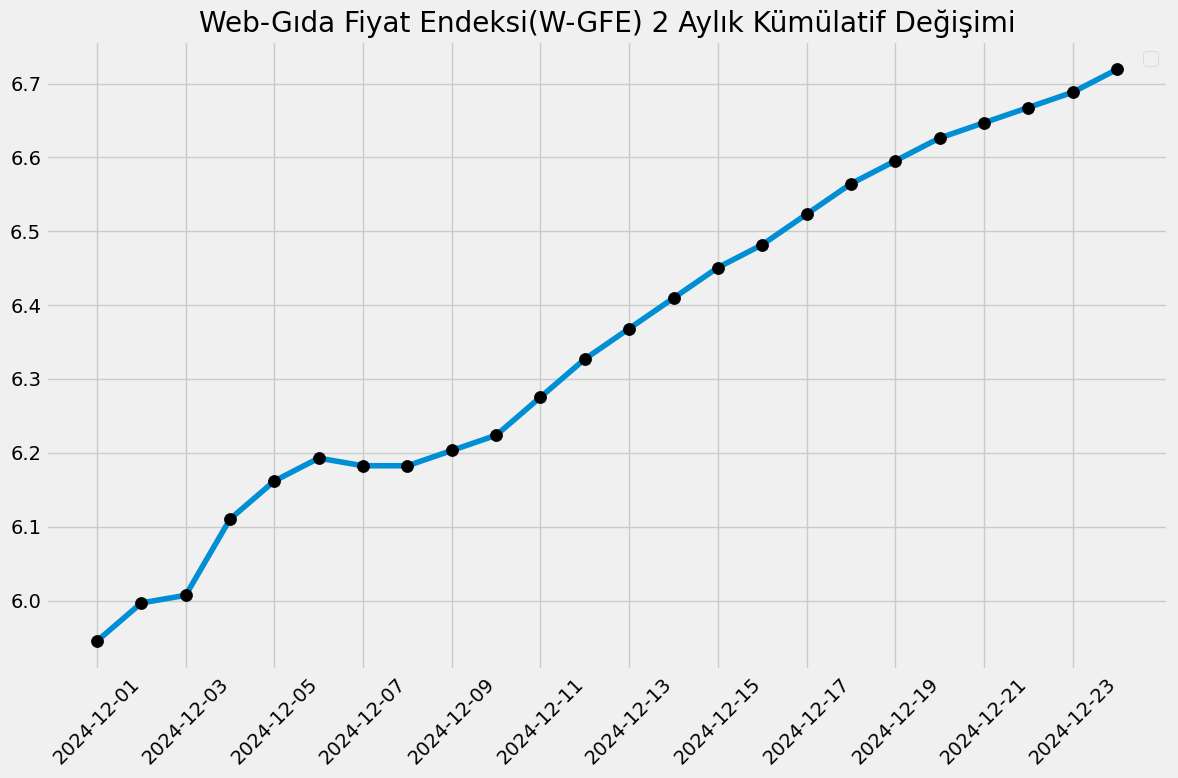

In [311]:
plt.figure(figsize=(12,8))
plt.title("Web-Gıda Fiyat Endeksi(W-GFE) 2 Aylık Kümülatif Değişimi")
plt.plot(((((degisim_2_24/100)+1)*1.032)-1)*100)
plt.scatter(x=(((((degisim_2_24/100)+1)*1.032)-1)*100).index,y=(((((degisim_2_24/100)+1)*1.032)-1)*100).values,color="black",zorder=3,s=75)
plt.xticks(degisim_2_24.index[::2],rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("kümülatif_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

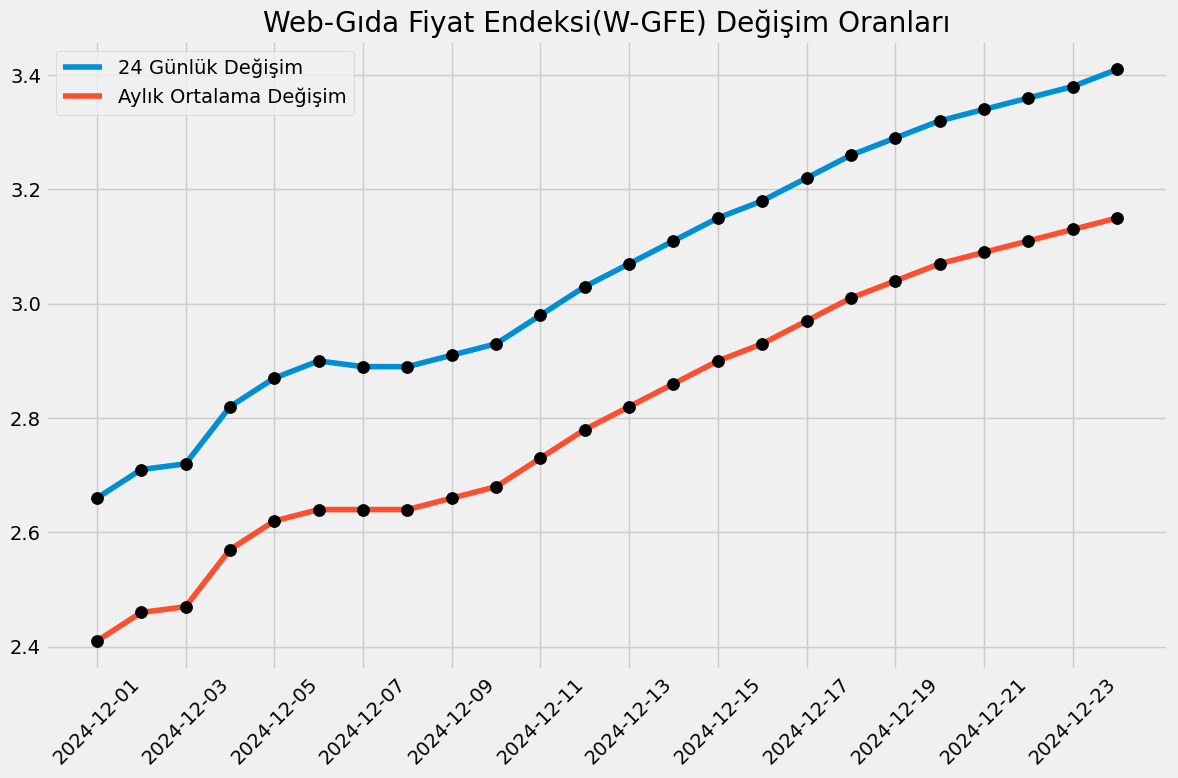

In [312]:
plt.figure(figsize=(12,8))
plt.title("Web-Gıda Fiyat Endeksi(W-GFE) Değişim Oranları")
plt.plot(degisim_2_24,label="24 Günlük Değişim")
plt.plot(degisim_aylık,label="Aylık Ortalama Değişim")
plt.scatter(x=degisim_2_24.index,y=degisim_2_24.values,color="black",zorder=3,s=75)
plt.scatter(x=degisim_aylık.index,y=degisim_aylık.values,color="black",zorder=3,s=75)
plt.xticks(degisim_2_24.index[::2],rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("aylıkdegisim_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

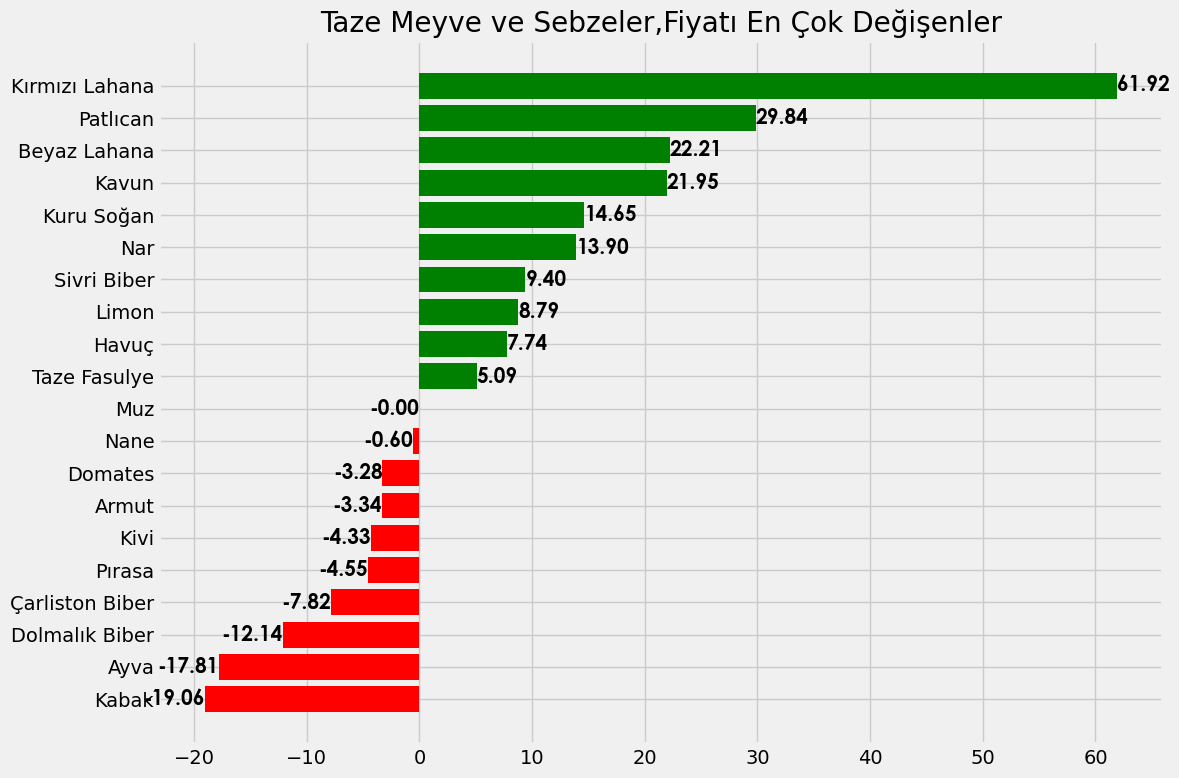

In [313]:
meyveler=pd.read_excel("Weights_2022.xlsx")["Unnamed: 1"].dropna().iloc[2:130].iloc[37:51].values
sebzeler=pd.read_excel("Weights_2022.xlsx")["Unnamed: 1"].dropna().iloc[2:130].iloc[61:85].values
meyvesebzeler=endeksler.loc[np.concatenate([meyveler,sebzeler])].sort_values(by="Değişim")["Değişim"]
veri=pd.concat([meyvesebzeler.sort_values().head(10),meyvesebzeler.sort_values().tail(10)],axis=0)
plt.figure(figsize=(12,8))
plt.title("Taze Meyve ve Sebzeler,Fiyatı En Çok Değişenler")


colors = ['green' if value > 0 else 'red' for value in veri.values]
bars = plt.barh(y=veri.index, width=veri.values, color=colors)

# Değer etiketlerini ekle
for bar in bars:
    plt.text(
        bar.get_width(),  # Çubuğun genişliği (değeri)
        bar.get_y() + bar.get_height() / 2,  # Çubuğun orta noktası
        f'{bar.get_width():.2f}',  # Değeri iki ondalık basamakla göster
        va='center',  # Dikey hizalama
        ha='left' if bar.get_width() > 0 else 'right',  # Pozitifse sola, negatifse sağa hizala
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}
    )
plt.tight_layout()
plt.savefig("meyvesebze_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [100]:
ağırlıklar=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/ağırlıklar.csv")

ağırlıklar=ağırlıklar.sort_index()
ağırlıklar

,Ürün,Unnamed: 0,Ağırlık,Değişim,Endeks_2024-10-11,Endeks_2024-10-12,Ağırlıklı Endeks_2024-10-12,Endeks_2024-10-13,Ağırlıklı Endeks_2024-10-13,Endeks_2024-10-14,...,Endeks_2024-12-24,Ağırlıklı Endeks_2024-12-24,Endeks_2024-12-25,Ağırlıklı Endeks_2024-12-25,Endeks_2024-12-26,Ağırlıklı Endeks_2024-12-26,Endeks_2024-12-27,Ağırlıklı Endeks_2024-12-27,Endeks_2024-12-28,Ağırlıklı Endeks_2024-12-28
0,Antep Fıstığı,0,0.001360,3.063199,100.0,100.0,0.135967,100.000000,0.135967,100.000000,...,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132
1,Armut,1,0.007882,-7.581419,100.0,100.0,0.788155,100.000000,0.788155,100.000000,...,93.281611,0.735204,98.496405,0.776305,101.752901,0.801971,92.089342,0.725807,92.418581,0.728402
2,Ay Çekirdeği,2,0.002469,0.983510,100.0,100.0,0.246883,100.000000,0.246883,100.000000,...,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312
3,Ayran,3,0.002014,3.243320,100.0,100.0,0.201394,100.042099,0.201479,100.042099,...,102.620518,0.206672,102.620518,0.206672,103.243320,0.207926,103.243320,0.207926,103.243320,0.207926
4,Ayva,4,0.001106,-3.887606,100.0,100.0,0.110594,100.000000,0.110594,100.000000,...,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295,96.112394,0.106295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Çikolata Tablet,123,0.002119,14.113841,100.0,100.0,0.211882,100.000000,0.211882,100.561798,...,114.393085,0.242378,113.926263,0.241389,113.926263,0.241389,113.926263,0.241389,114.113841,0.241787
124,Çilek,124,0.003543,0.000000,100.0,100.0,0.354264,100.000000,0.354264,100.000000,...,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264,100.000000,0.354264
125,Üzüm,125,0.017232,5.442003,100.0,100.0,1.723196,100.000000,1.723196,100.000000,...,104.586388,1.802229,103.843304,1.789424,102.947692,1.773991,104.016154,1.792403,105.442003,1.816973
126,Şeftali,126,0.002112,0.017876,100.0,100.0,0.211200,100.000000,0.211200,100.017876,...,100.017876,0.211238,100.017876,0.211238,100.017876,0.211238,100.017876,0.211238,100.017876,0.211238


In [107]:
meyvesebzeharic=ağırlıklar[~ağırlıklar["Ürün"].isin(meyvesebze)]["Ürün"].values

In [109]:
ağırlıklar_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebzeharic)]
ağırlıklar_meyvesebzeharic["Ağırlık"]=ağırlıklar_meyvesebzeharic["Ağırlık"]/ağırlıklar_meyvesebzeharic["Ağırlık"].sum()
ağırlıklar_meyvesebzeharic=ağırlıklar_meyvesebzeharic.sort_values(by="Ürün")
ağırlıklar_meyvesebzeharic

,Ürün,Unnamed: 0,Ağırlık,Değişim,Endeks_2024-10-11,Endeks_2024-10-12,Ağırlıklı Endeks_2024-10-12,Endeks_2024-10-13,Ağırlıklı Endeks_2024-10-13,Endeks_2024-10-14,...,Endeks_2024-12-24,Ağırlıklı Endeks_2024-12-24,Endeks_2024-12-25,Ağırlıklı Endeks_2024-12-25,Endeks_2024-12-26,Ağırlıklı Endeks_2024-12-26,Endeks_2024-12-27,Ağırlıklı Endeks_2024-12-27,Endeks_2024-12-28,Ağırlıklı Endeks_2024-12-28
0,Antep Fıstığı,0,0.001722,3.063199,100.0,100.000000,0.135967,100.000000,0.135967,100.000000,...,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132,103.063199,0.140132
2,Ay Çekirdeği,2,0.003127,0.983510,100.0,100.000000,0.246883,100.000000,0.246883,100.000000,...,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312,100.983510,0.249312
3,Ayran,3,0.002551,3.243320,100.0,100.000000,0.201394,100.042099,0.201479,100.042099,...,102.620518,0.206672,102.620518,0.206672,103.243320,0.207926,103.243320,0.207926,103.243320,0.207926
5,Ayçiçek Yağı,5,0.006069,12.502387,100.0,100.387276,0.481110,100.387276,0.481110,101.327991,...,112.502387,0.539172,112.502387,0.539172,112.502387,0.539172,112.502387,0.539172,112.502387,0.539172
6,Badem İçi,6,0.001910,4.504244,100.0,99.166667,0.149547,99.166667,0.149547,99.166667,...,104.691921,0.157879,104.504244,0.157596,104.504244,0.157596,104.504244,0.157596,104.504244,0.157596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Zeytinyağı,119,0.003744,-5.843740,100.0,100.000000,0.295627,100.000000,0.295627,100.000000,...,93.782019,0.277245,93.735937,0.277109,93.735937,0.277109,93.735937,0.277109,94.156260,0.278352
121,Çay,121,0.010888,11.596991,100.0,100.000000,0.859753,100.000000,0.859753,100.000000,...,111.509202,0.958704,111.423312,0.957966,111.596991,0.959459,111.596991,0.959459,111.596991,0.959459
122,Çikolata Krem,122,0.005386,3.549661,100.0,100.000000,0.425258,100.000000,0.425258,100.000000,...,103.500390,0.440143,103.550069,0.440354,103.466347,0.439998,103.678356,0.440900,103.549661,0.440353
123,Çikolata Tablet,123,0.002683,14.113841,100.0,100.000000,0.211882,100.000000,0.211882,100.561798,...,114.393085,0.242378,113.926263,0.241389,113.926263,0.241389,113.926263,0.241389,114.113841,0.241787


In [316]:
medyan=datasa.pct_change().loc["2024-12-31"].median()*100

In [317]:
sa_enflasyon=[]
for row in datasa.index:
        ay=datasa.loc[row]
        ay=ay.sort_index()
        ağırlıklar=ağırlık[ağırlık["Madde"].isin(ay.index.values)]
        ağırlıklar["Ağırlık"]=100*(ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum())
        ağırlıklar=ağırlıklar.sort_values(by="Ağırlık")
        sa_enflasyon.append(np.sum(ay.values*ağırlıklar["Ağırlık"])/100)
sa_enflasyon=pd.DataFrame(sa_enflasyon)
sa_enflasyon=sa_enflasyon.set_index(pd.date_range(start="2019-01-31",freq="M",periods=len(sa_enflasyon)))
sa_enflasyon=sa_enflasyon.pct_change().dropna()*100
sa_enflasyon

,0
2019-02-28,-0.273490
2019-03-31,1.110265
2019-04-30,0.518434
2019-05-31,0.594168
2019-06-30,1.103720
...,...
2024-08-31,1.724212
2024-09-30,4.499057
2024-10-31,2.885335
2024-11-30,3.299771


In [318]:
egilim=pd.DataFrame()
egilim["W-GFE"]=sa_enflasyon.iloc[-1]
egilim["SATRIM"]=[satrim[-1]]
egilim["Medyan"]=[medyan]
egilim["Aritmetik Ortalama"]=[datasa.pct_change().loc["2024-12-31"].mean()*100]
egilim["Meyve ve Sebze Hariç"]=[meyvesebzeharic_artıs]
egilim

,W-GFE,SATRIM,Medyan,Aritmetik Ortalama,Meyve ve Sebze Hariç
0,2.852221,2.49579,2.800088,2.717896,2.848354


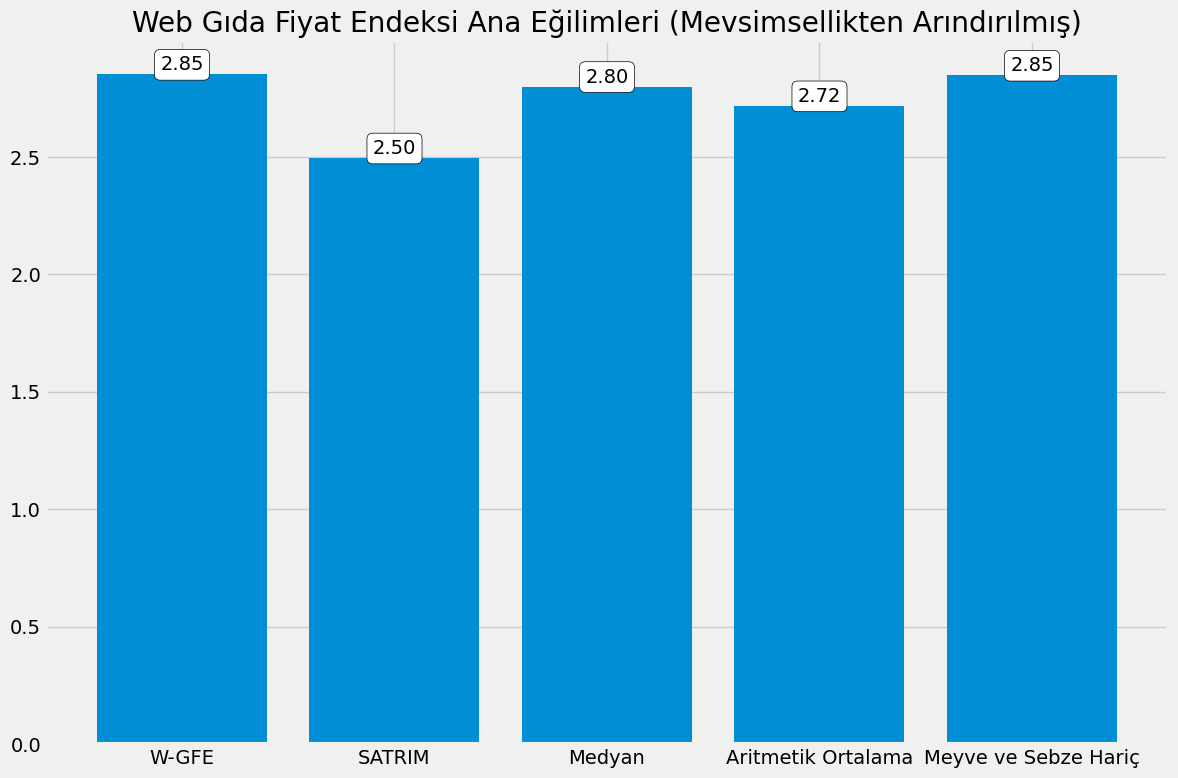

In [319]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
# Grafiği çiz
plt.figure(figsize=(12, 8))
plt.title("Web Gıda Fiyat Endeksi Ana Eğilimleri (Mevsimsellikten Arındırılmış)")
plt.bar(x=egilim.columns, height=egilim.values[0])

# Değerleri kutu içinde sütunların hemen üstüne ekle
for i, value in enumerate(egilim.values[0]):
    plt.text(
        i, value, f'{value:.2f}', ha='center', va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")  # Kutuyu ayarlar
    )
plt.tight_layout()
plt.savefig("egilim_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


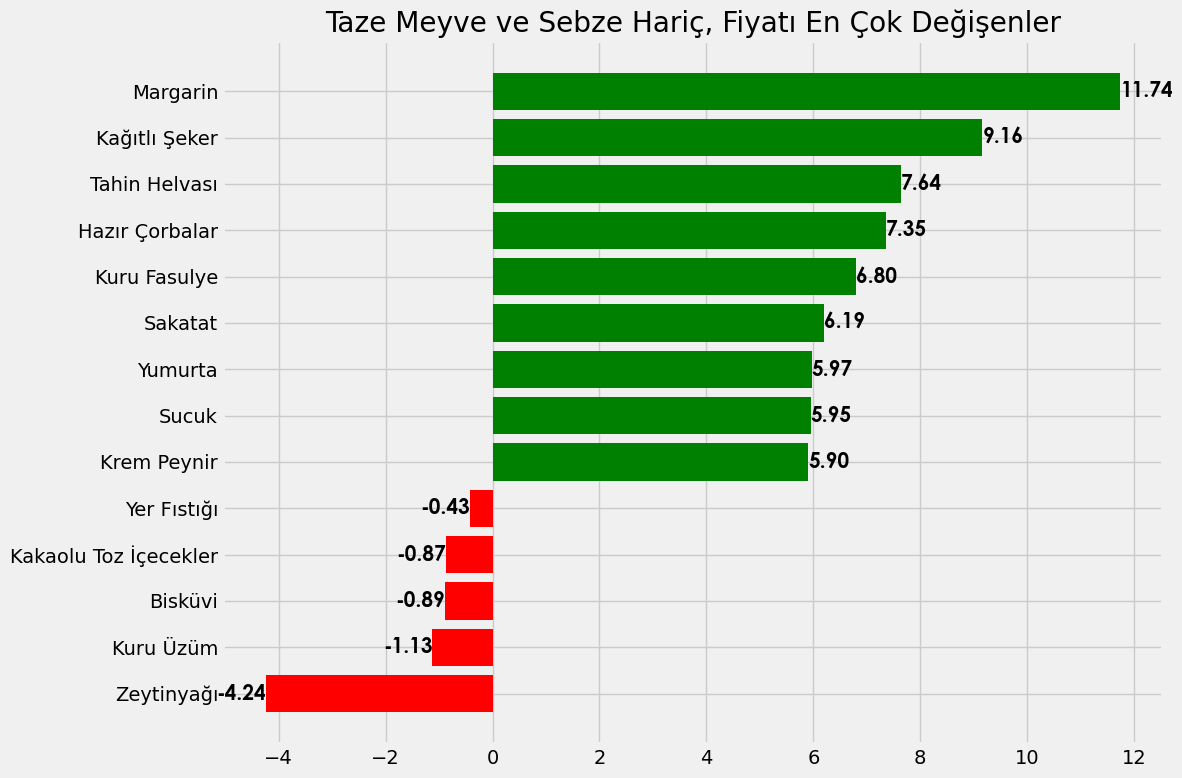

In [320]:
meyvesebzeharic=endeksler.drop(meyvesebzeler.index).sort_values(by="Değişim")["Değişim"]

veri=pd.concat([meyvesebzeharic.sort_values().head(5),meyvesebzeharic.sort_values().tail(9)],axis=0)
plt.figure(figsize=(12,8))
plt.title("Taze Meyve ve Sebze Hariç, Fiyatı En Çok Değişenler")
colors = ['green' if value > 0 else 'red' for value in veri.values]
bars = plt.barh(y=veri.index, width=veri.values, color=colors)

# Değer etiketlerini ekle
for bar in bars:
    plt.text(
        bar.get_width(),  # Çubuğun genişliği (değeri)
        bar.get_y() + bar.get_height() / 2,  # Çubuğun orta noktası
        f'{bar.get_width():.2f}',  # Değeri iki ondalık basamakla göster
        va='center',  # Dikey hizalama
        ha='left' if bar.get_width() > 0 else 'right',  # Pozitifse sola, negatifse sağa hizala
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}
    )
plt.tight_layout()
plt.savefig("haric_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

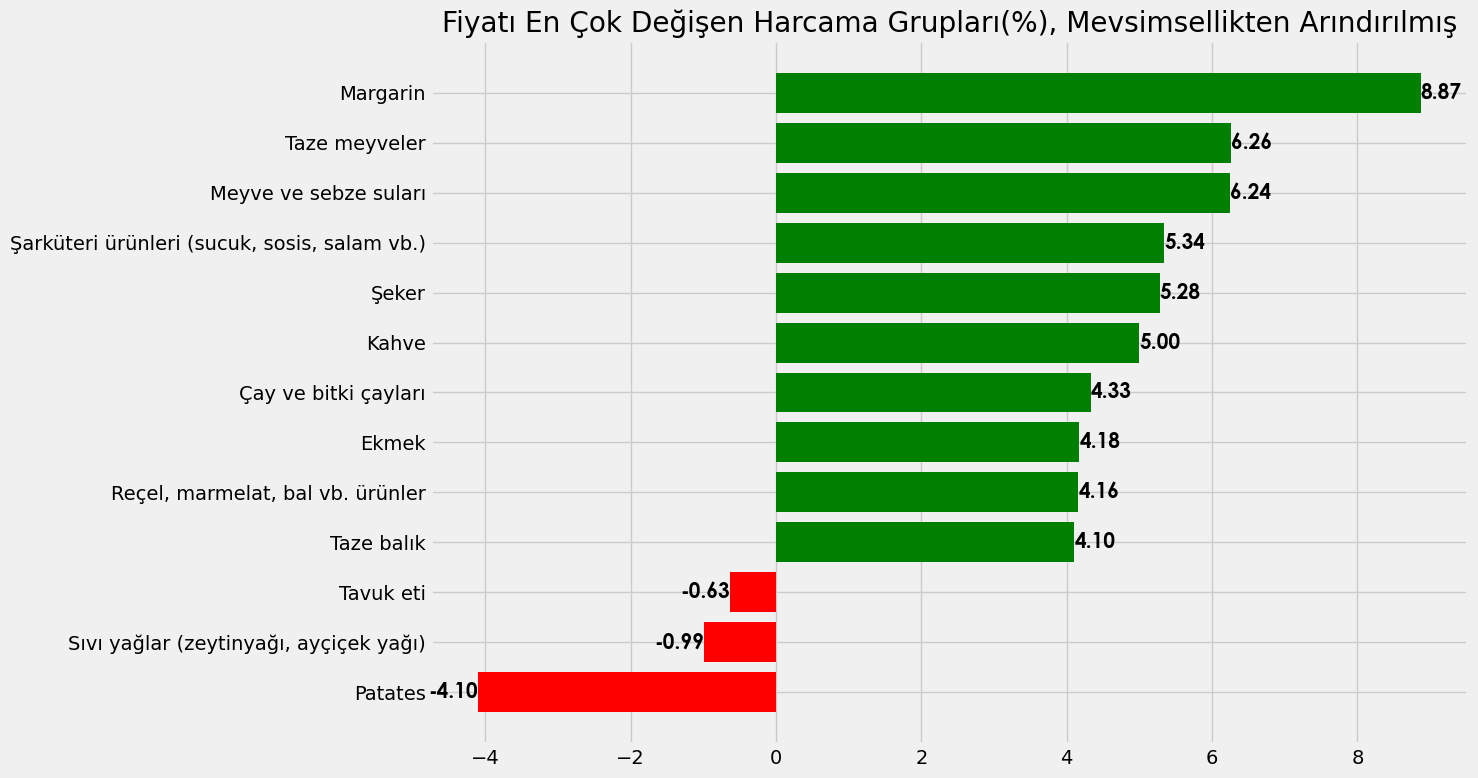

In [321]:
aylık_datasa=datasa.pct_change().dropna().loc["2024-12-31"].sort_values()*100
veri=pd.concat([aylık_datasa.sort_values().head(3),aylık_datasa.sort_values().tail(10)],axis=0)
plt.figure(figsize=(15,8))
plt.title("Fiyatı En Çok Değişen Harcama Grupları(%), Mevsimsellikten Arındırılmış")
colors = ['green' if value > 0 else 'red' for value in veri.values]
bars = plt.barh(y=veri.index, width=veri.values, color=colors)
for bar in bars:
    plt.text(
        bar.get_width(),  # Çubuğun genişliği (değeri)
        bar.get_y() + bar.get_height() / 2,  # Çubuğun orta noktası
        f'{bar.get_width():.2f}',  # Değeri iki ondalık basamakla göster
        va='center',  # Dikey hizalama
        ha='left' if bar.get_width() > 0 else 'right',  # Pozitifse sola, negatifse sağa hizala
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}
    )
plt.tight_layout()
plt.savefig("harcamasa" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()



In [322]:
ay=datetime.now().month

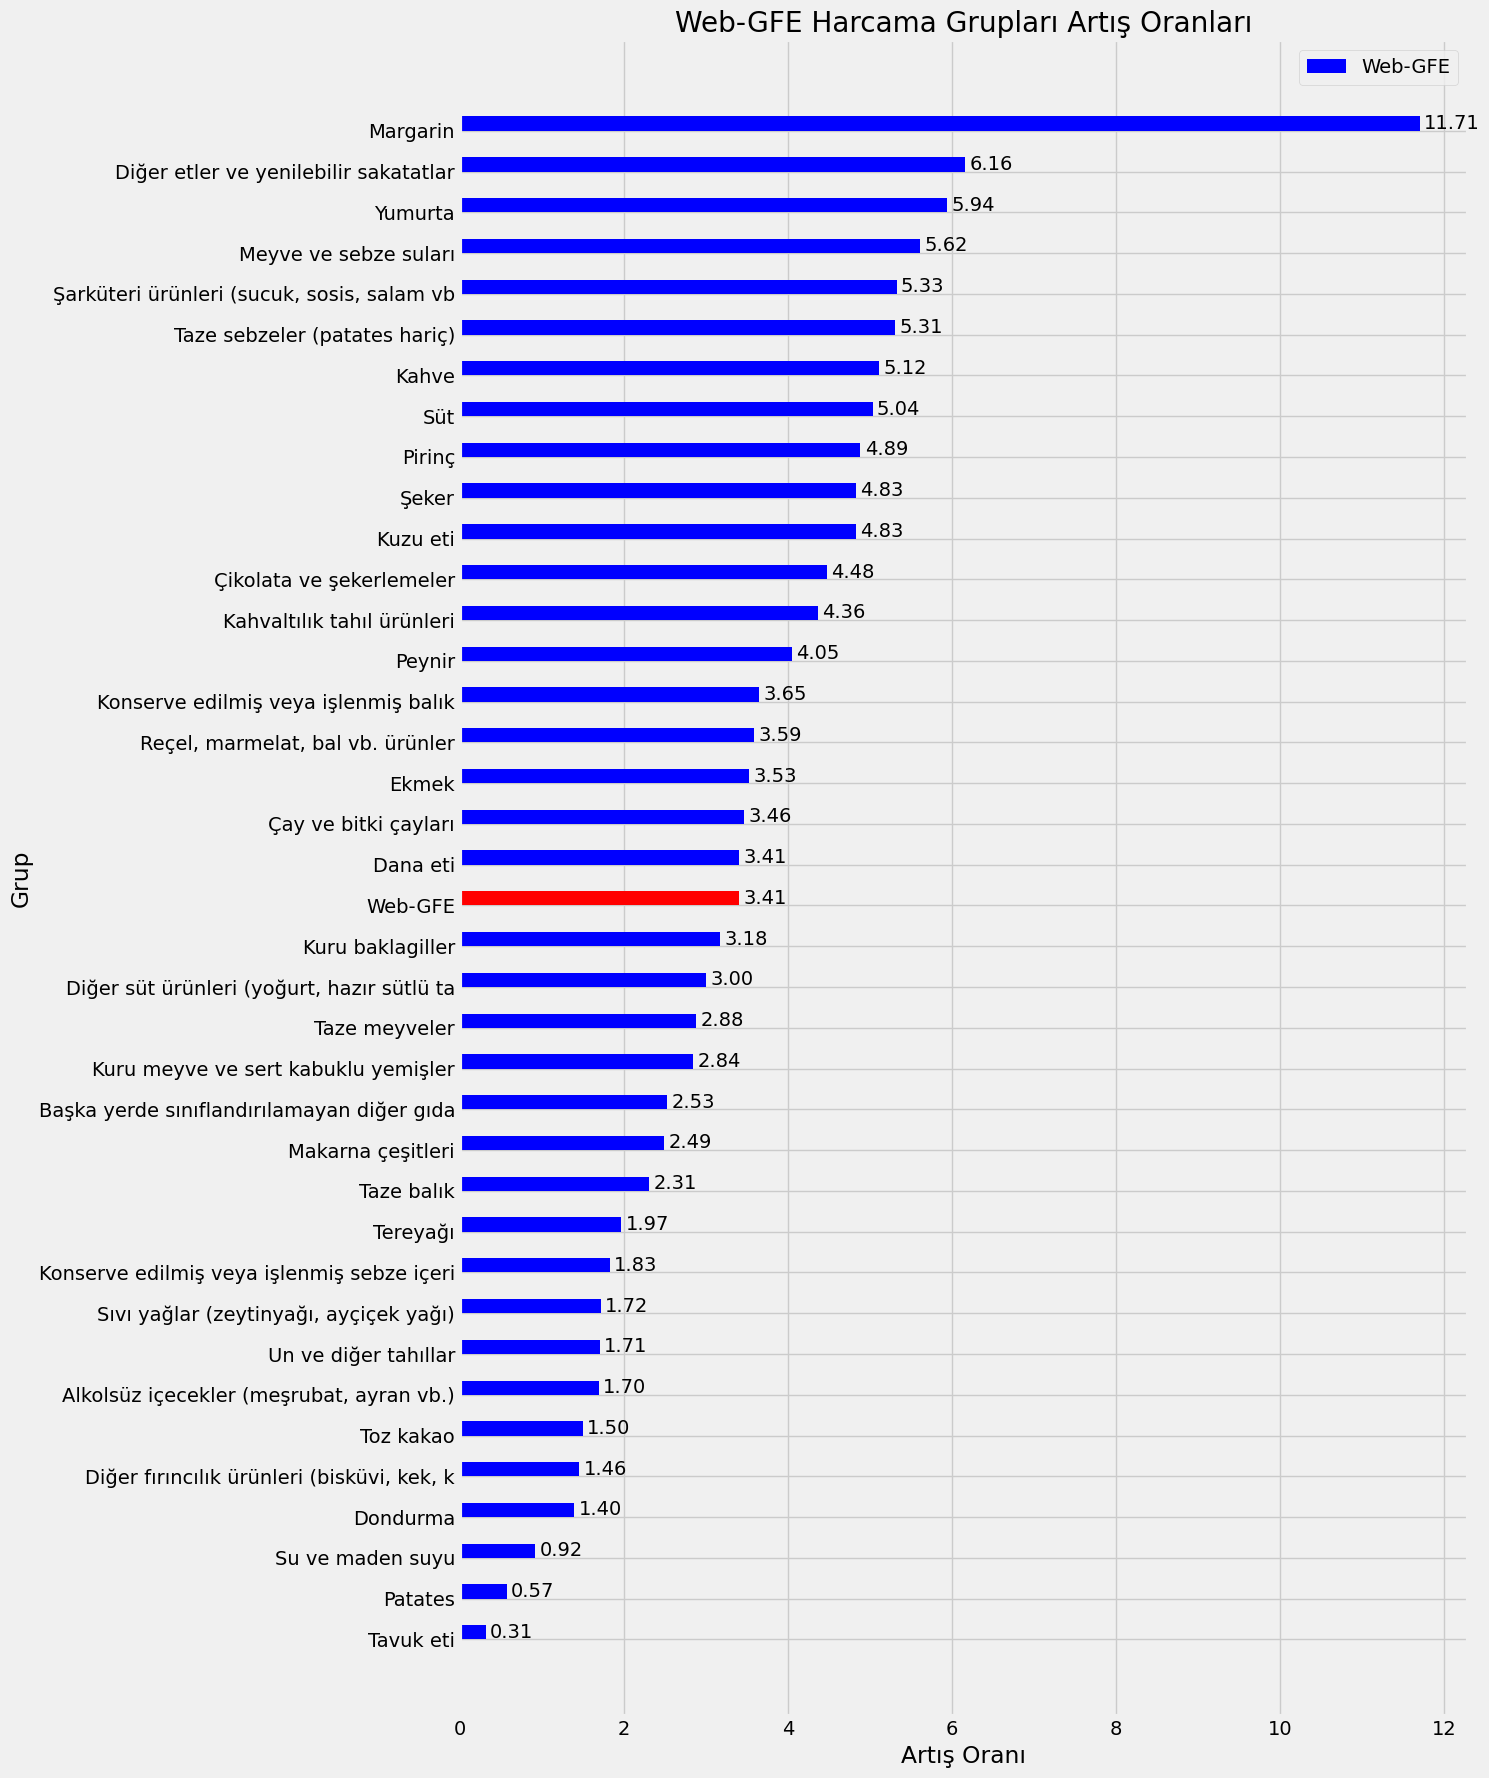

In [323]:
weighted_indices_ma["Web-GFE"]=((hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill").loc[f"{yıl}-{ay}"]["Aylık Ortalama"].iloc[-1]/hareketli_aylik_ortalama(gfe["GFE"]).fillna(method="ffill").loc[f"{yıl}-{önceki_ay}"]["Aylık Ortalama"].iloc[-1]-1)*100)
weighted_indices_ma=weighted_indices_ma.T.sort_values(by=0)
fig, ax = plt.subplots(figsize=(15, 18))

x = np.arange(len(weighted_indices_ma.index))  # the label locations
width = 0.35  # the width of the bars
shortened_index = [label[:42] for label in weighted_indices_ma.index]
colors = ['red' if label == 'Web-GFE' else 'blue' for label in weighted_indices_ma.index]
rects2 = ax.barh(x + width/2, weighted_indices_ma[0], height=width, label='Web-GFE',color=colors)

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Grup')
ax.set_xlabel('Artış Oranı')
ax.set_title('Web-GFE Harcama Grupları Artış Oranları')
ax.set_yticks(x)
ax.set_yticklabels(shortened_index)
ax.legend()

def add_labels_horizontal(rects):
    for rect in rects:
        width = rect.get_width()
        if width < 0:  # Negatif değerler için
            ax.annotate(f'{width:.2f}',
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(-5, 0),  # 5 points horizontal offset to the left
                        textcoords="offset points",
                        ha='right', va='center')
        else:  # Pozitif değerler için
            ax.annotate(f'{width:.2f}',
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(3, 0),  # 3 points horizontal offset to the right
                        textcoords="offset points",
                        ha='left', va='center')


# Adding labels to bars in horizontal orientation
add_labels_horizontal(rects2)


plt.tight_layout()
plt.savefig("gruplar_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

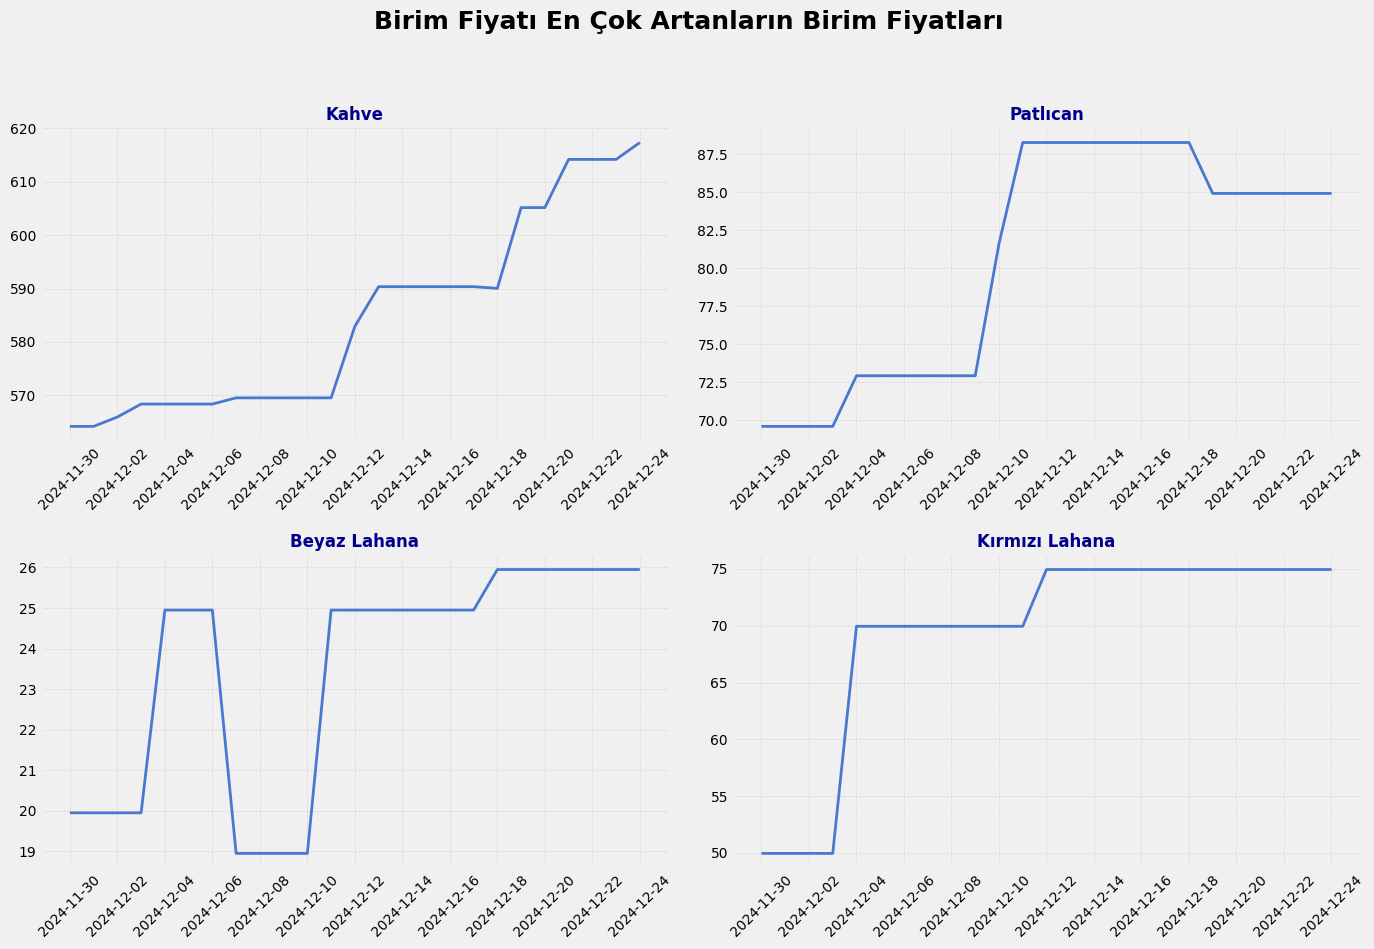

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# Stil ayarı
plt.style.use('seaborn-v0_8-muted')  # Modern ve temiz bir görünüm için tema

# Veriyi çek ve hazırlık
birim = get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/birim.csv")
birim = birim.set_index("Unnamed: 0")
birim.index = pd.to_datetime(birim.index)

# Değişim hesaplama
degisim = (birim.loc[f"{yıl}-{ay}"].iloc[-1] / birim.loc[f"{yıl}-{önceki_ay}-30"] - 1) * 100
encok = degisim.sort_values().tail(4).index.values
enaz=degisim.sort_values().head(4).index.values
# Grafik oluşturma
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Birim Fiyatı En Çok Artanların Birim Fiyatları", fontsize=18, fontweight='bold')

# 2x2 düzeninde grafikleri çiz
for i, ax in enumerate(axs.flat):
    ax.plot(birim[encok[i]].loc[f"{yıl}-{önceki_ay}-30":], linewidth=2)
    ax.set_title(encok[i], fontsize=12, fontweight='bold', color='darkblue')
    
    # X Ekseni ayarı
    tarih_araligi = birim[encok[i]].loc[f"{yıl}-{önceki_ay}-30":].index[::2]
    ax.set_xticks(tarih_araligi)
    ax.set_xticklabels(tarih_araligi.strftime('%Y-%m-%d'), rotation=45, fontsize=10)
    
    # Izgara ayarı
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.spines['top'].set_visible(False)  # Üst kenarlık gizle
    ax.spines['right'].set_visible(False)  # Sağ kenarlık gizle

# Ana başlık ve düzenleme
fig.subplots_adjust(top=0.88, hspace=0.3, wspace=0.2)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("birim_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


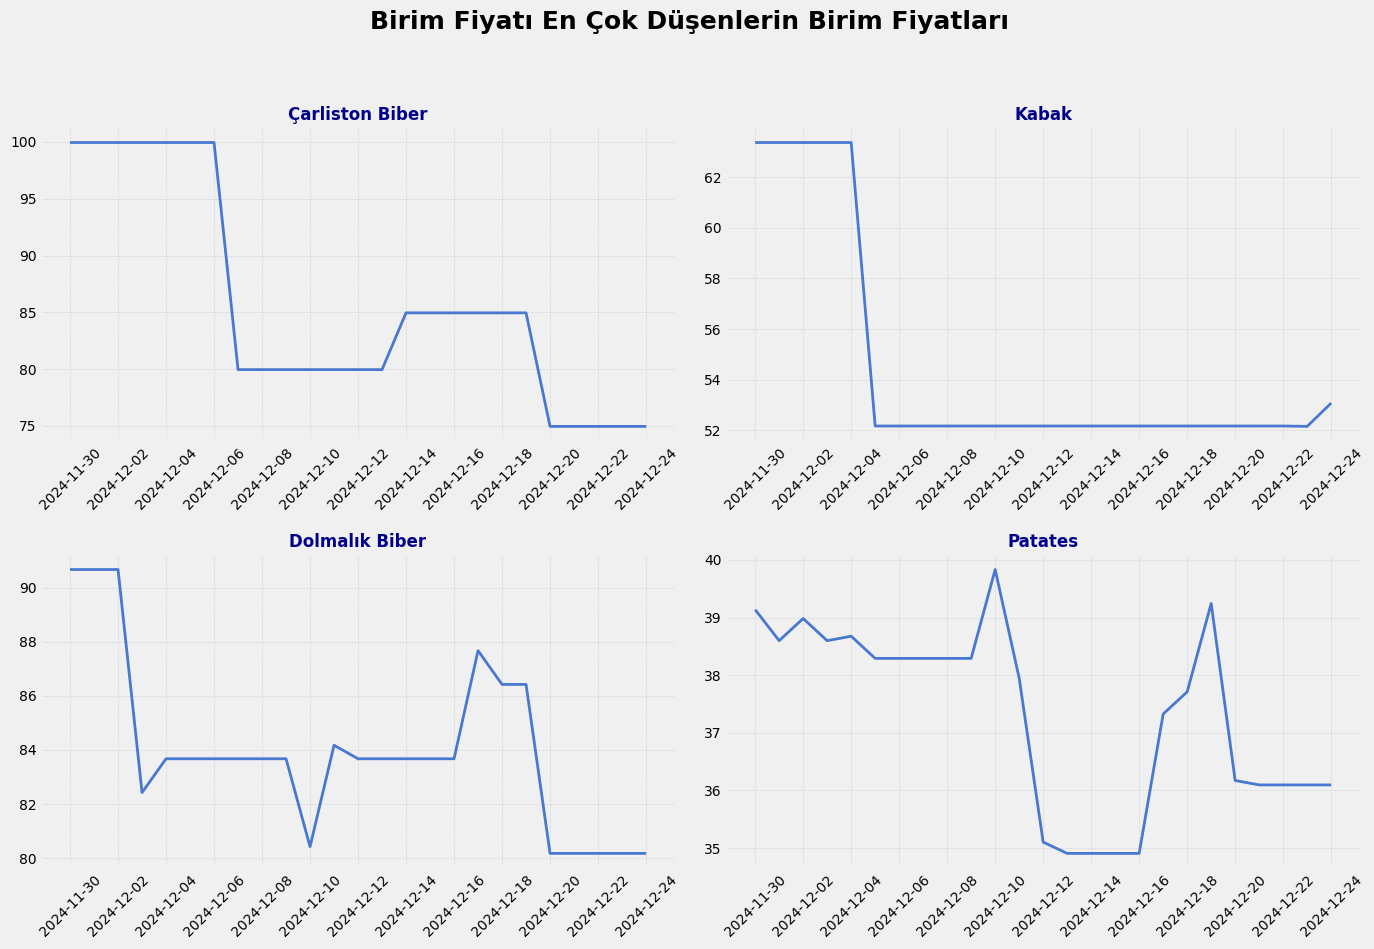

In [325]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Birim Fiyatı En Çok Düşenlerin Birim Fiyatları", fontsize=18, fontweight='bold')

# 2x2 düzeninde grafikleri çiz
for i, ax in enumerate(axs.flat):
    ax.plot(birim[enaz[i]].loc[f"{yıl}-{önceki_ay}-30":], linewidth=2)
    ax.set_title(enaz[i], fontsize=12, fontweight='bold', color='darkblue')
    
    # X Ekseni ayarı
    tarih_araligi = birim[enaz[i]].loc[f"{yıl}-{önceki_ay}-30":].index[::2]
    ax.set_xticks(tarih_araligi)
    ax.set_xticklabels(tarih_araligi.strftime('%Y-%m-%d'), rotation=45, fontsize=10)
    
    # Izgara ayarı
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.spines['top'].set_visible(False)  # Üst kenarlık gizle
    ax.spines['right'].set_visible(False)  # Sağ kenarlık gizle

# Ana başlık ve düzenleme
fig.subplots_adjust(top=0.88, hspace=0.3, wspace=0.2)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("birimdüşen_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()